In [1]:
# Import library

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.util import random_noise
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import os

In [2]:
# List gambar

image_folder = "gambar"
image_files = [
    "kupu-geometris.jpg",
    "lidahbuaya-rumit.jpg",
    "tang-gelap.jpg",
    "telur-lengkung.jpg",
    "ijuk-thinline.jpg"
]

In [3]:
# Preprocessing

def preprocess_image(img_path, noise_type=None, noise_amount=0.01):
    # baca gambar
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Gambar {img_path} tidak ditemukan!")
    
    # ubah ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # resize
    gray = cv2.resize(gray, (256, 256))
    
    # tambahkan noise jika ada
    if noise_type == 'gaussian':
        gray = random_noise(gray, mode='gaussian', var=noise_amount**2)
        gray = (gray * 255).astype(np.uint8)
    elif noise_type == 's&p':
        gray = random_noise(gray, mode='s&p', amount=noise_amount)
        gray = (gray * 255).astype(np.uint8)
    
    return gray

In [4]:
# Operator edge detection

def sobel_edge(gray):
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    sobel = cv2.magnitude(sobelx, sobely)
    return sobel.astype(np.uint8)

def prewitt_edge(gray):
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(gray, -1, kernelx)
    prewitty = cv2.filter2D(gray, -1, kernely)
    prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))
    return prewitt.astype(np.uint8)

def log_edge(gray):
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    log = cv2.Laplacian(blur, cv2.CV_64F)
    return np.uint8(np.absolute(log))

def canny_edge(gray, low=100, high=200):
    canny = cv2.Canny(gray, low, high)
    return canny

In [5]:
# Thresholding Otsu

def otsu_threshold(edge_img):
    th = threshold_otsu(edge_img)
    bin_img = (edge_img > th).astype(np.uint8) * 255
    return bin_img

In [9]:
# Fungsi hitung MSE dan PSNR

def calculate_mse_psnr(original_img, processed_img):
    mse = mean_squared_error(original_img, processed_img)
    psnr = peak_signal_noise_ratio(original_img, processed_img, data_range=255)
    return mse, psnr

kupu-geometris.jpg | Noise: None 0.01
Sobel: MSE=20273.65, PSNR=5.06 dB
Prewitt: MSE=21491.27, PSNR=4.81 dB
LoG: MSE=23194.98, PSNR=4.48 dB
Canny: MSE=21861.61, PSNR=4.73 dB
--------------------------------------------------


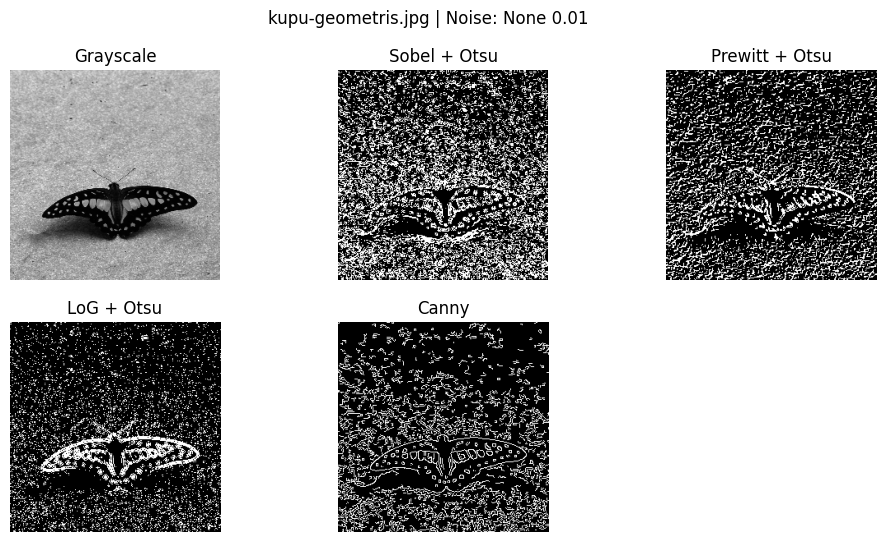

kupu-geometris.jpg | Noise: None 0.05
Sobel: MSE=20273.65, PSNR=5.06 dB
Prewitt: MSE=21491.27, PSNR=4.81 dB
LoG: MSE=23194.98, PSNR=4.48 dB
Canny: MSE=21861.61, PSNR=4.73 dB
--------------------------------------------------


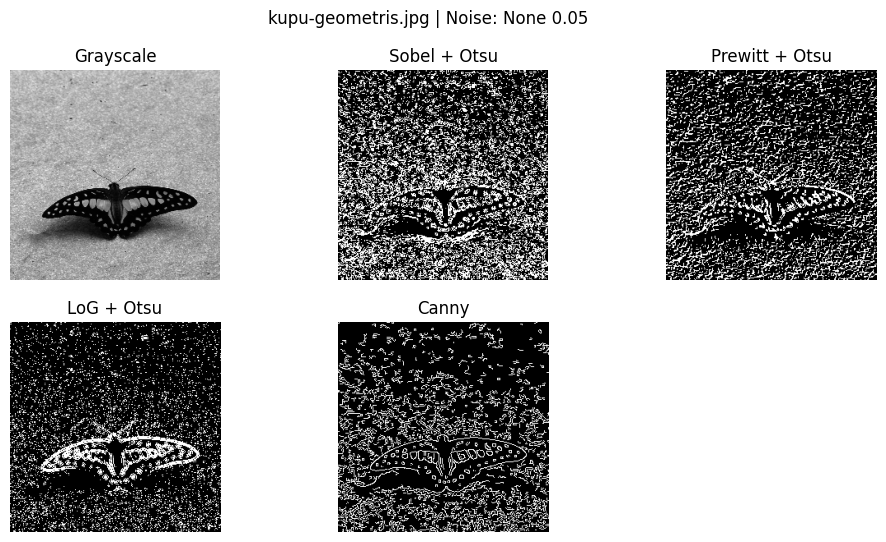

kupu-geometris.jpg | Noise: gaussian 0.01
Sobel: MSE=20276.37, PSNR=5.06 dB
Prewitt: MSE=21423.69, PSNR=4.82 dB
LoG: MSE=23148.76, PSNR=4.49 dB
Canny: MSE=21757.41, PSNR=4.75 dB
--------------------------------------------------


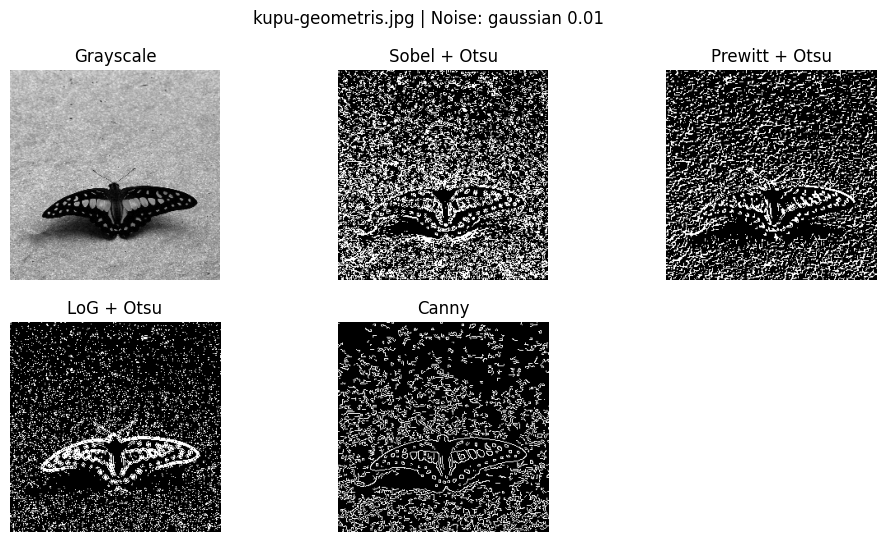

kupu-geometris.jpg | Noise: gaussian 0.05
Sobel: MSE=19388.91, PSNR=5.26 dB
Prewitt: MSE=20738.79, PSNR=4.96 dB
LoG: MSE=21934.31, PSNR=4.72 dB
Canny: MSE=20060.89, PSNR=5.11 dB
--------------------------------------------------


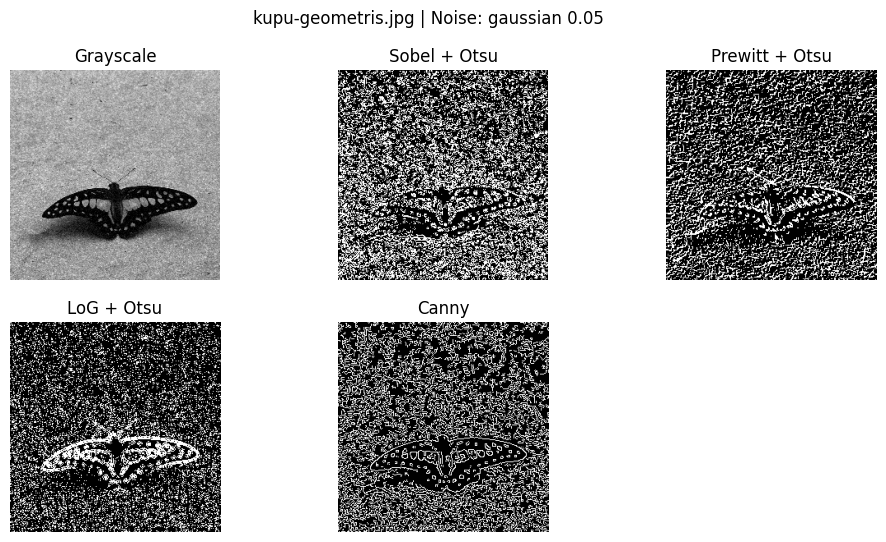

kupu-geometris.jpg | Noise: s&p 0.01
Sobel: MSE=20769.28, PSNR=4.96 dB
Prewitt: MSE=22684.97, PSNR=4.57 dB
LoG: MSE=23685.16, PSNR=4.39 dB
Canny: MSE=21289.70, PSNR=4.85 dB
--------------------------------------------------


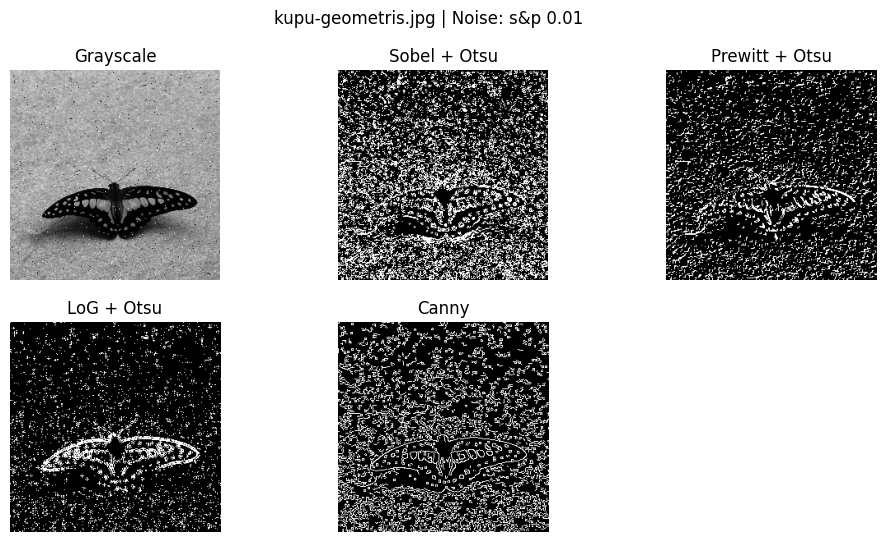

kupu-geometris.jpg | Noise: s&p 0.05
Sobel: MSE=20617.76, PSNR=4.99 dB
Prewitt: MSE=22148.91, PSNR=4.68 dB
LoG: MSE=23325.52, PSNR=4.45 dB
Canny: MSE=20074.42, PSNR=5.10 dB
--------------------------------------------------


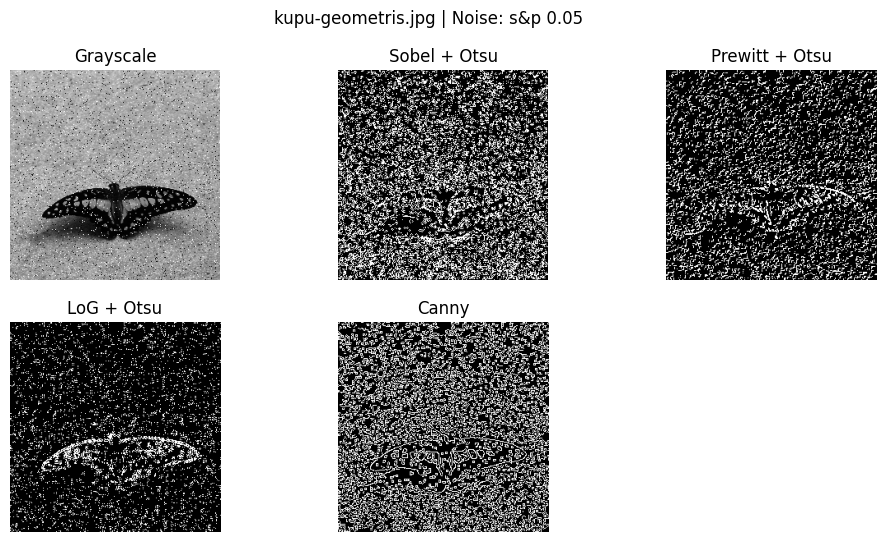

lidahbuaya-rumit.jpg | Noise: None 0.01
Sobel: MSE=16930.65, PSNR=5.84 dB
Prewitt: MSE=15005.36, PSNR=6.37 dB
LoG: MSE=13492.06, PSNR=6.83 dB
Canny: MSE=16209.75, PSNR=6.03 dB
--------------------------------------------------


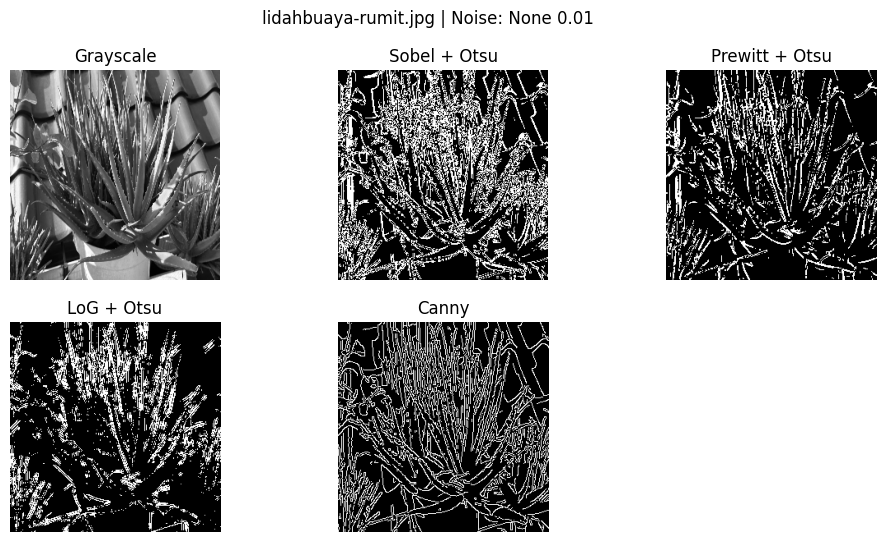

lidahbuaya-rumit.jpg | Noise: None 0.05
Sobel: MSE=16930.65, PSNR=5.84 dB
Prewitt: MSE=15005.36, PSNR=6.37 dB
LoG: MSE=13492.06, PSNR=6.83 dB
Canny: MSE=16209.75, PSNR=6.03 dB
--------------------------------------------------


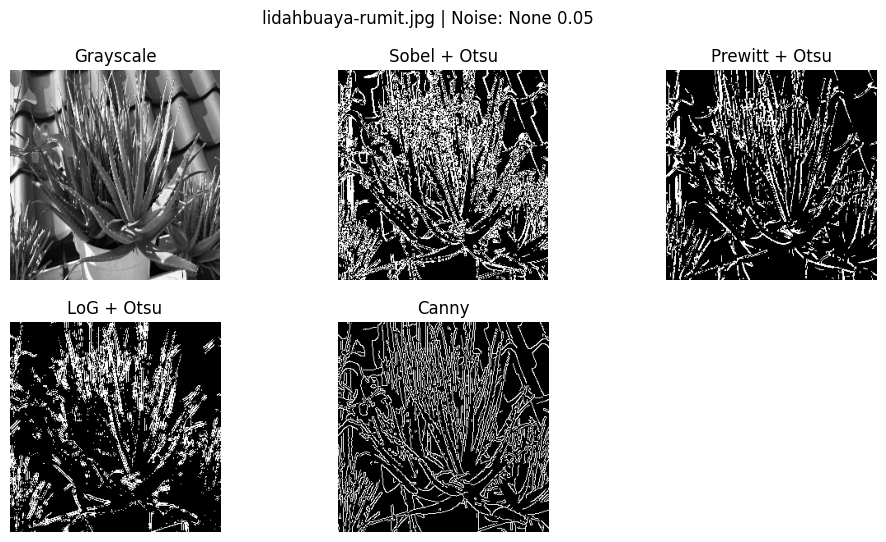

lidahbuaya-rumit.jpg | Noise: gaussian 0.01
Sobel: MSE=16893.57, PSNR=5.85 dB
Prewitt: MSE=14987.21, PSNR=6.37 dB
LoG: MSE=13488.00, PSNR=6.83 dB
Canny: MSE=16230.30, PSNR=6.03 dB
--------------------------------------------------


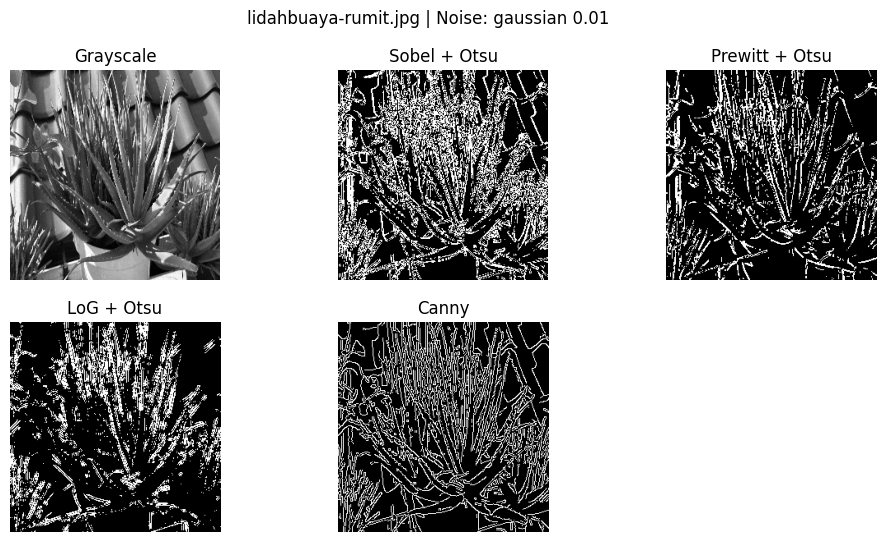

lidahbuaya-rumit.jpg | Noise: gaussian 0.05
Sobel: MSE=17323.26, PSNR=5.74 dB
Prewitt: MSE=15223.38, PSNR=6.31 dB
LoG: MSE=13524.15, PSNR=6.82 dB
Canny: MSE=17094.89, PSNR=5.80 dB
--------------------------------------------------


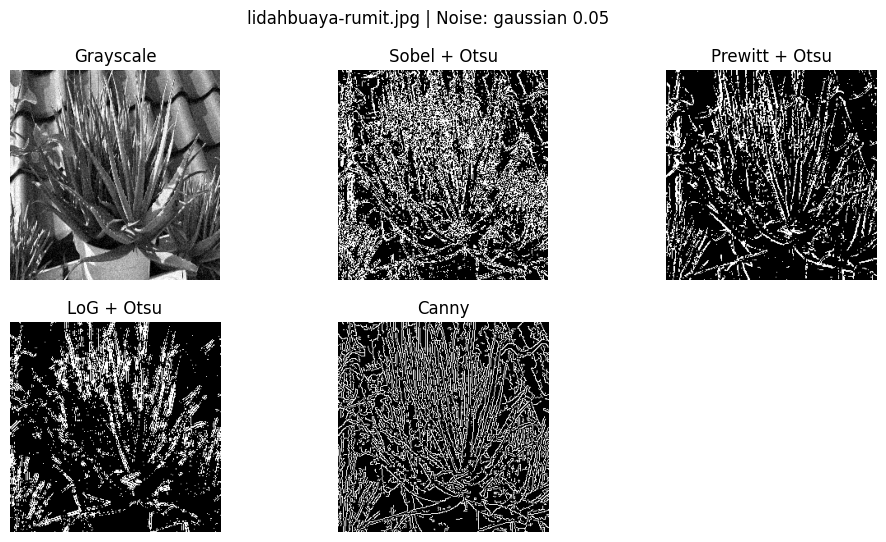

lidahbuaya-rumit.jpg | Noise: s&p 0.01
Sobel: MSE=17086.23, PSNR=5.80 dB
Prewitt: MSE=15190.68, PSNR=6.32 dB
LoG: MSE=13707.64, PSNR=6.76 dB
Canny: MSE=16582.79, PSNR=5.93 dB
--------------------------------------------------


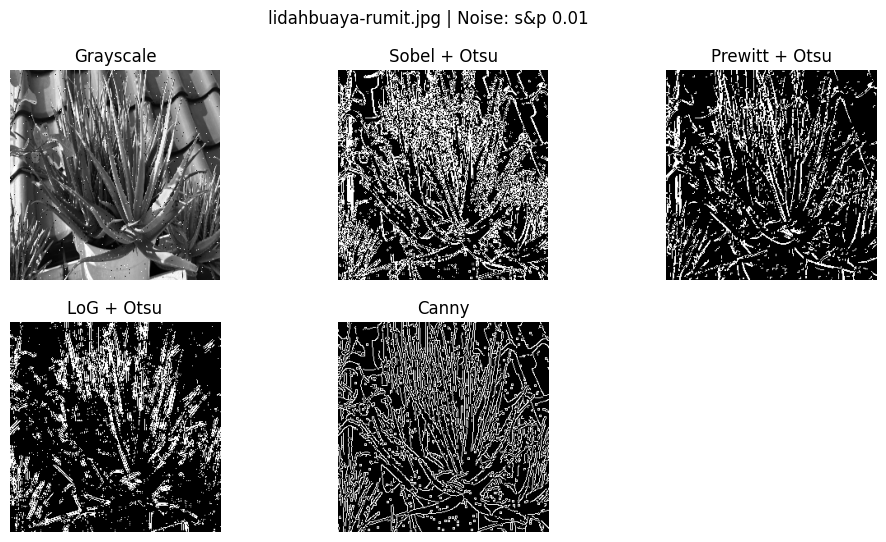

lidahbuaya-rumit.jpg | Noise: s&p 0.05
Sobel: MSE=17725.51, PSNR=5.64 dB
Prewitt: MSE=15875.76, PSNR=6.12 dB
LoG: MSE=14110.38, PSNR=6.64 dB
Canny: MSE=17723.48, PSNR=5.65 dB
--------------------------------------------------


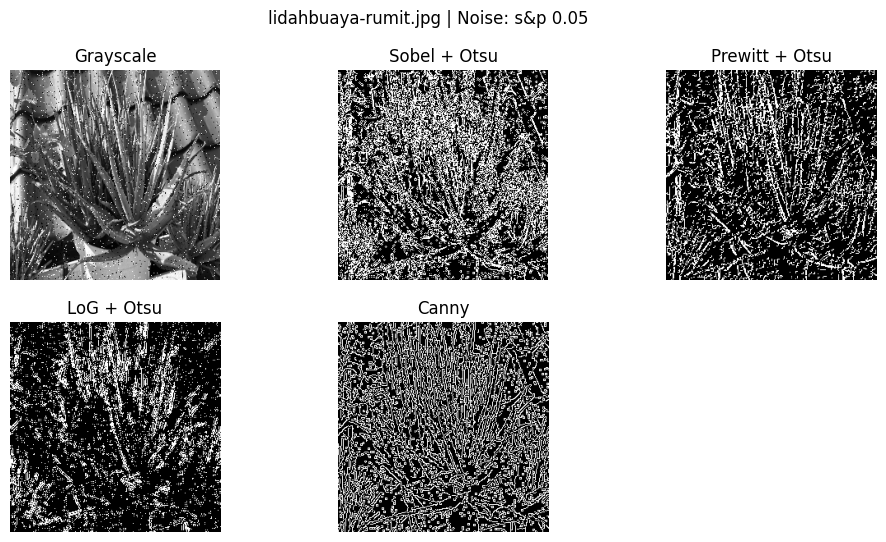

tang-gelap.jpg | Noise: None 0.01
Sobel: MSE=2384.18, PSNR=14.36 dB
Prewitt: MSE=1497.48, PSNR=16.38 dB
LoG: MSE=2313.87, PSNR=14.49 dB
Canny: MSE=337.15, PSNR=22.85 dB
--------------------------------------------------


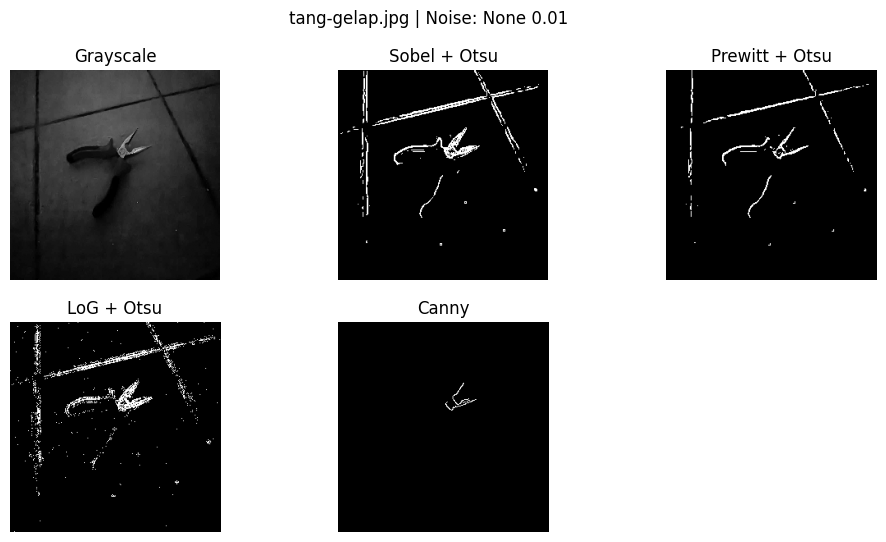

tang-gelap.jpg | Noise: None 0.05
Sobel: MSE=2384.18, PSNR=14.36 dB
Prewitt: MSE=1497.48, PSNR=16.38 dB
LoG: MSE=2313.87, PSNR=14.49 dB
Canny: MSE=337.15, PSNR=22.85 dB
--------------------------------------------------


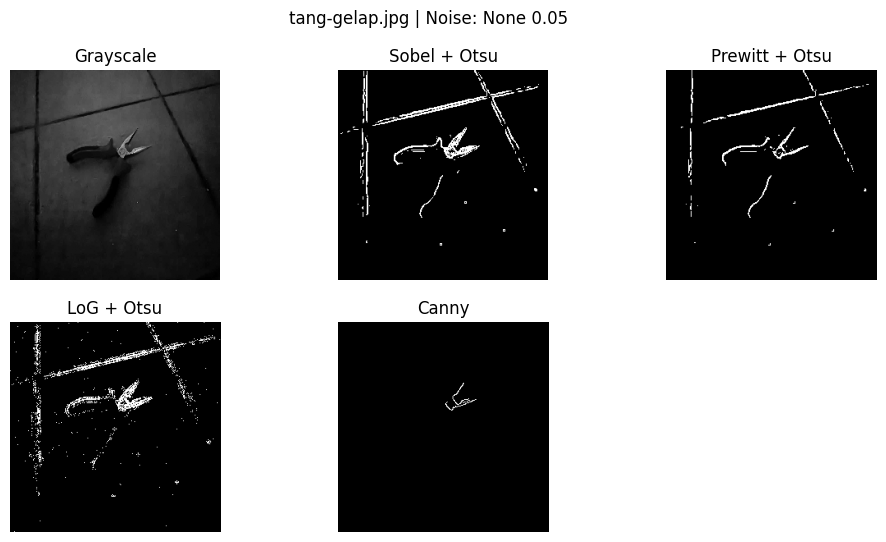

tang-gelap.jpg | Noise: gaussian 0.01
Sobel: MSE=1917.07, PSNR=15.30 dB
Prewitt: MSE=1391.49, PSNR=16.70 dB
LoG: MSE=15448.09, PSNR=6.24 dB
Canny: MSE=354.19, PSNR=22.64 dB
--------------------------------------------------


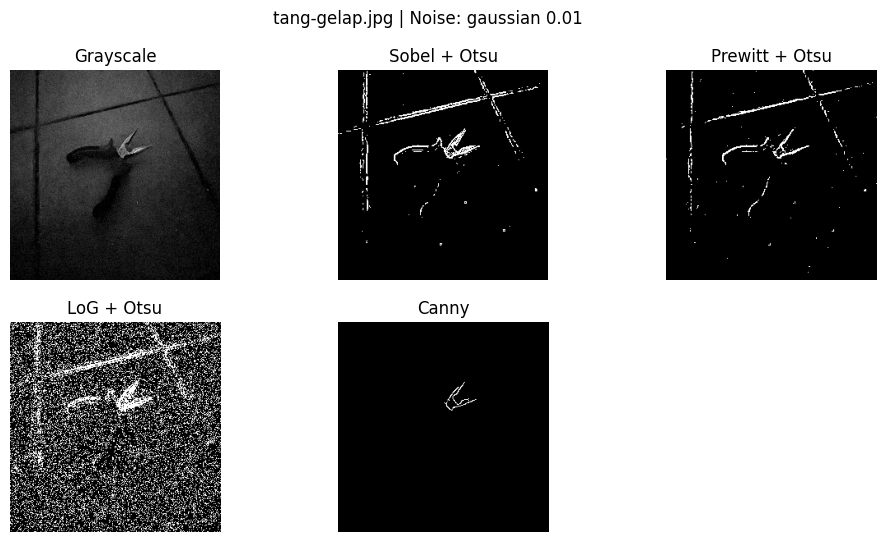

tang-gelap.jpg | Noise: gaussian 0.05
Sobel: MSE=21402.12, PSNR=4.83 dB
Prewitt: MSE=19696.28, PSNR=5.19 dB
LoG: MSE=16627.47, PSNR=5.92 dB
Canny: MSE=594.75, PSNR=20.39 dB
--------------------------------------------------


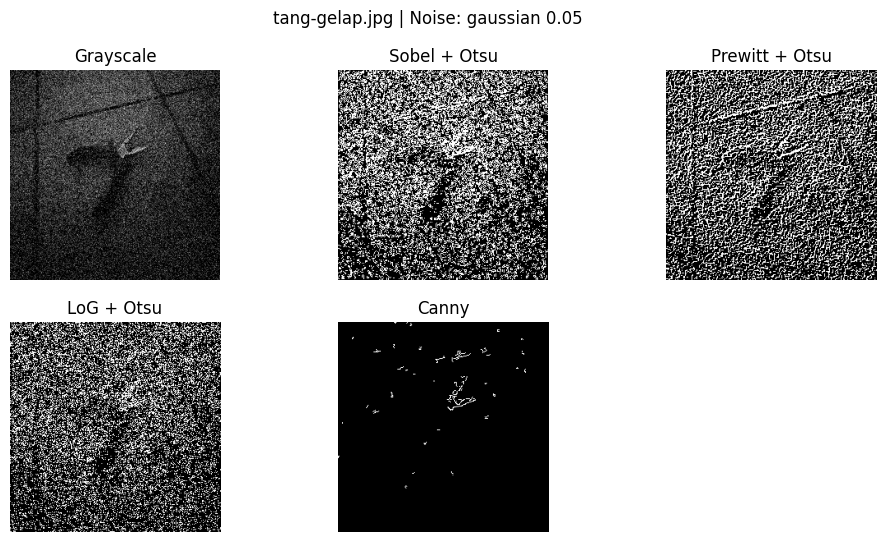

tang-gelap.jpg | Noise: s&p 0.01
Sobel: MSE=1404.04, PSNR=16.66 dB
Prewitt: MSE=1352.49, PSNR=16.82 dB
LoG: MSE=533.81, PSNR=20.86 dB
Canny: MSE=2467.36, PSNR=14.21 dB
--------------------------------------------------


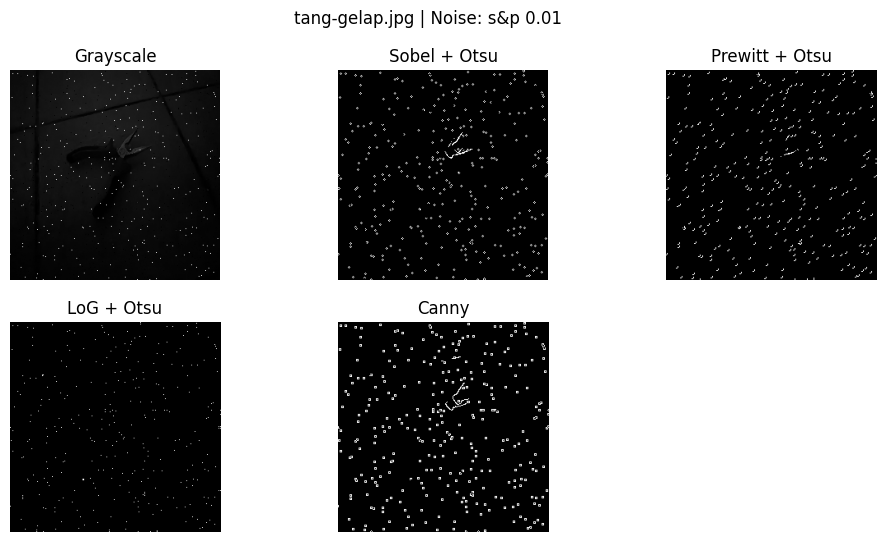

tang-gelap.jpg | Noise: s&p 0.05
Sobel: MSE=5422.08, PSNR=10.79 dB
Prewitt: MSE=5365.38, PSNR=10.83 dB
LoG: MSE=2080.49, PSNR=14.95 dB
Canny: MSE=9234.37, PSNR=8.48 dB
--------------------------------------------------


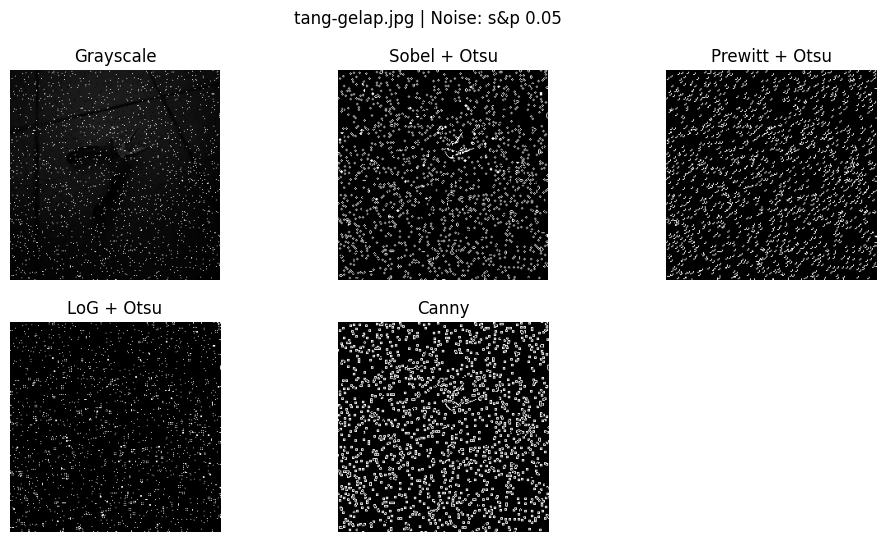

telur-lengkung.jpg | Noise: None 0.01
Sobel: MSE=11788.65, PSNR=7.42 dB
Prewitt: MSE=12555.10, PSNR=7.14 dB
LoG: MSE=12097.54, PSNR=7.30 dB
Canny: MSE=12897.76, PSNR=7.03 dB
--------------------------------------------------


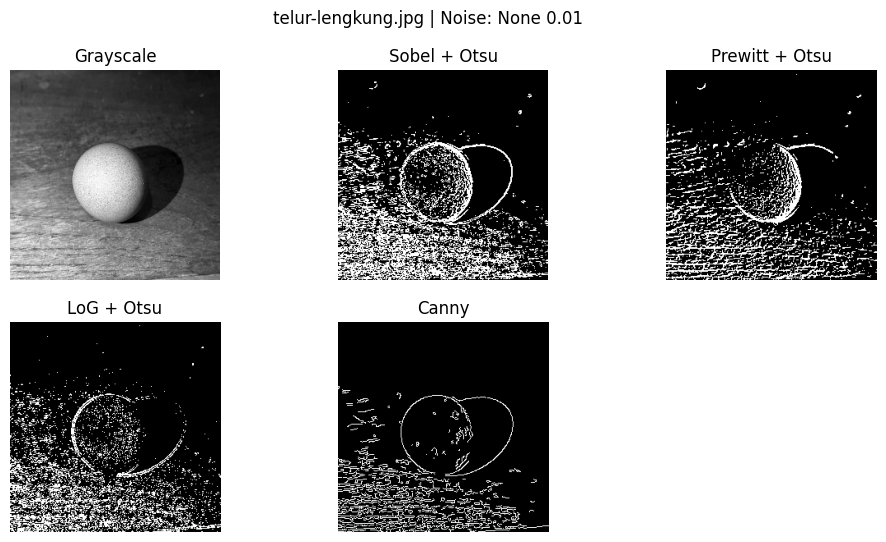

telur-lengkung.jpg | Noise: None 0.05
Sobel: MSE=11788.65, PSNR=7.42 dB
Prewitt: MSE=12555.10, PSNR=7.14 dB
LoG: MSE=12097.54, PSNR=7.30 dB
Canny: MSE=12897.76, PSNR=7.03 dB
--------------------------------------------------


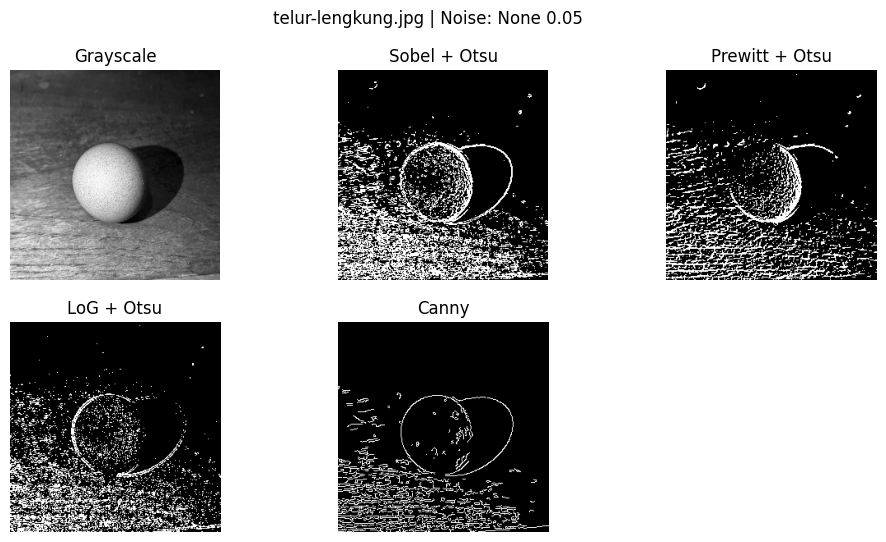

telur-lengkung.jpg | Noise: gaussian 0.01
Sobel: MSE=11860.68, PSNR=7.39 dB
Prewitt: MSE=12529.95, PSNR=7.15 dB
LoG: MSE=12059.87, PSNR=7.32 dB
Canny: MSE=12851.74, PSNR=7.04 dB
--------------------------------------------------


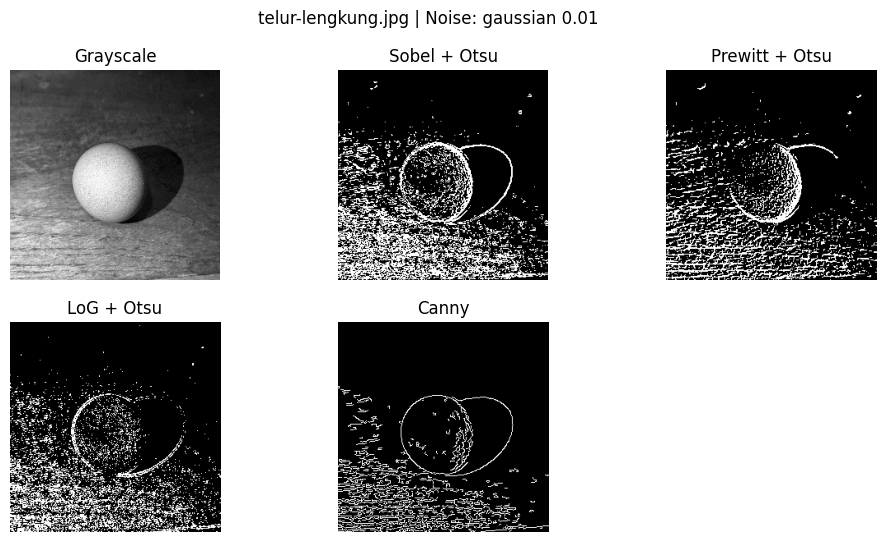

telur-lengkung.jpg | Noise: gaussian 0.05
Sobel: MSE=14149.21, PSNR=6.62 dB
Prewitt: MSE=14998.18, PSNR=6.37 dB
LoG: MSE=14440.62, PSNR=6.53 dB
Canny: MSE=13008.10, PSNR=6.99 dB
--------------------------------------------------


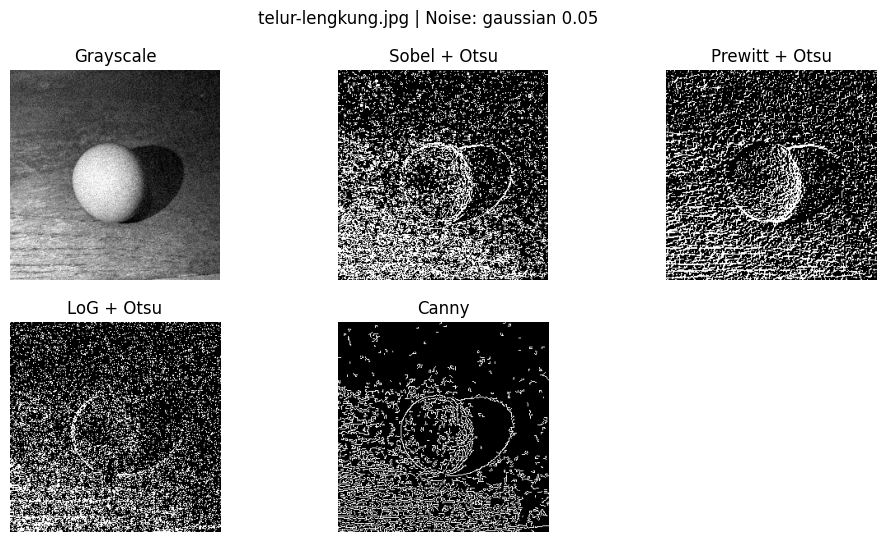

telur-lengkung.jpg | Noise: s&p 0.01
Sobel: MSE=12782.37, PSNR=7.06 dB
Prewitt: MSE=13532.33, PSNR=6.82 dB
LoG: MSE=13736.00, PSNR=6.75 dB
Canny: MSE=13680.76, PSNR=6.77 dB
--------------------------------------------------


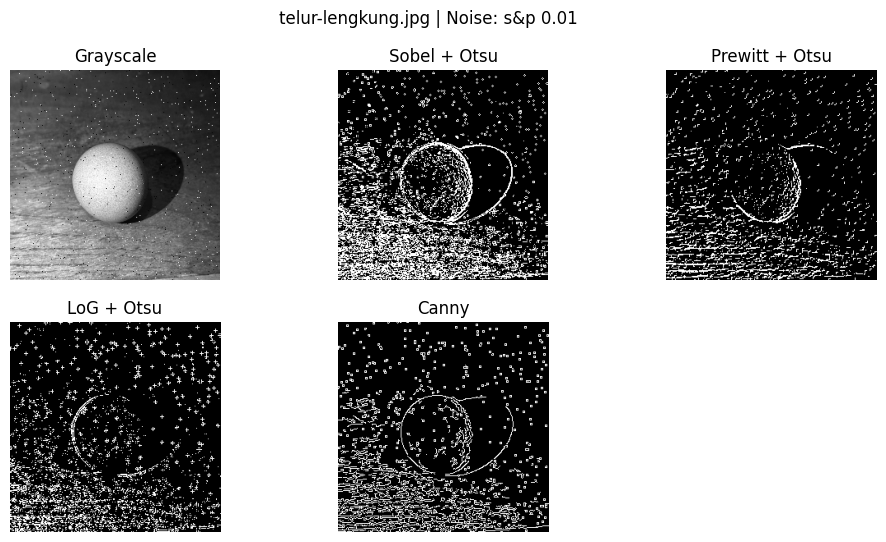

telur-lengkung.jpg | Noise: s&p 0.05
Sobel: MSE=14708.20, PSNR=6.46 dB
Prewitt: MSE=14685.36, PSNR=6.46 dB
LoG: MSE=14140.03, PSNR=6.63 dB
Canny: MSE=15666.52, PSNR=6.18 dB
--------------------------------------------------


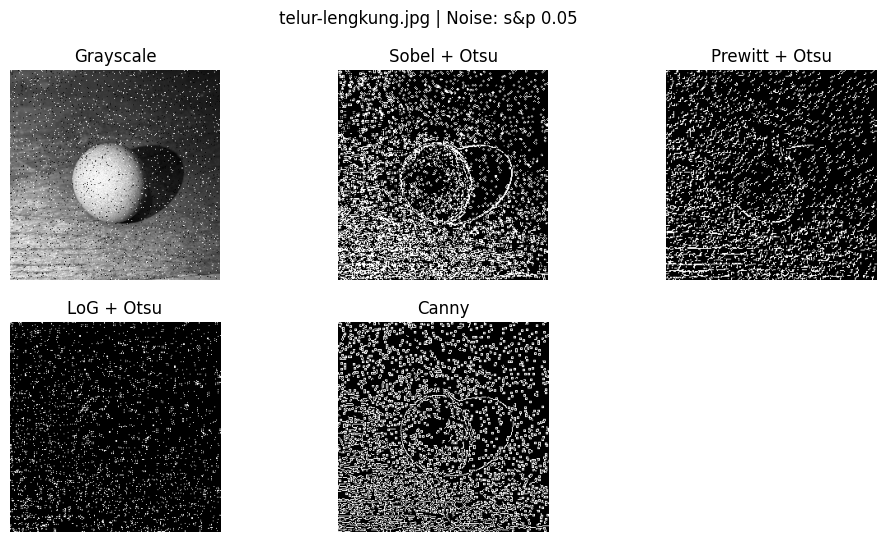

ijuk-thinline.jpg | Noise: None 0.01
Sobel: MSE=13285.68, PSNR=6.90 dB
Prewitt: MSE=12124.76, PSNR=7.29 dB
LoG: MSE=13008.06, PSNR=6.99 dB
Canny: MSE=12293.79, PSNR=7.23 dB
--------------------------------------------------


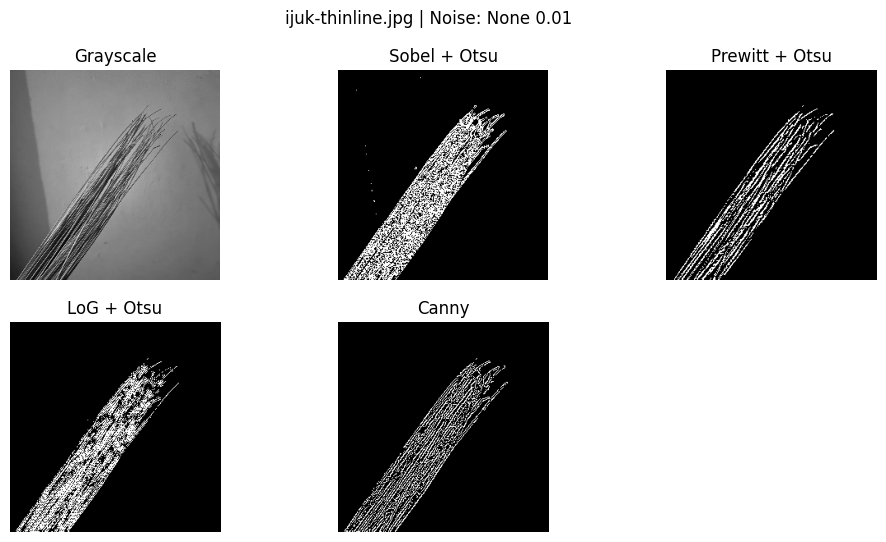

ijuk-thinline.jpg | Noise: None 0.05
Sobel: MSE=13285.68, PSNR=6.90 dB
Prewitt: MSE=12124.76, PSNR=7.29 dB
LoG: MSE=13008.06, PSNR=6.99 dB
Canny: MSE=12293.79, PSNR=7.23 dB
--------------------------------------------------


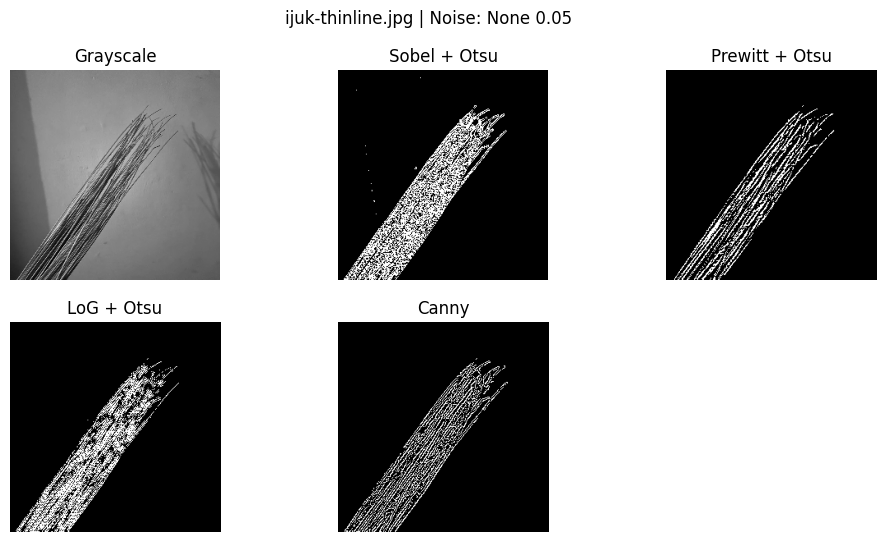

ijuk-thinline.jpg | Noise: gaussian 0.01
Sobel: MSE=13226.48, PSNR=6.92 dB
Prewitt: MSE=12106.33, PSNR=7.30 dB
LoG: MSE=12910.94, PSNR=7.02 dB
Canny: MSE=12304.22, PSNR=7.23 dB
--------------------------------------------------


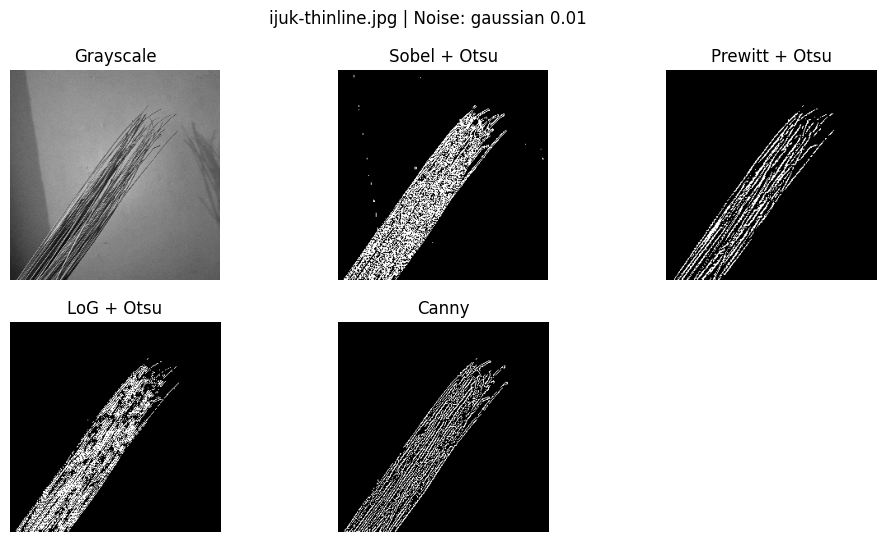

ijuk-thinline.jpg | Noise: gaussian 0.05
Sobel: MSE=14037.22, PSNR=6.66 dB
Prewitt: MSE=12739.91, PSNR=7.08 dB
LoG: MSE=12776.94, PSNR=7.07 dB
Canny: MSE=12528.85, PSNR=7.15 dB
--------------------------------------------------


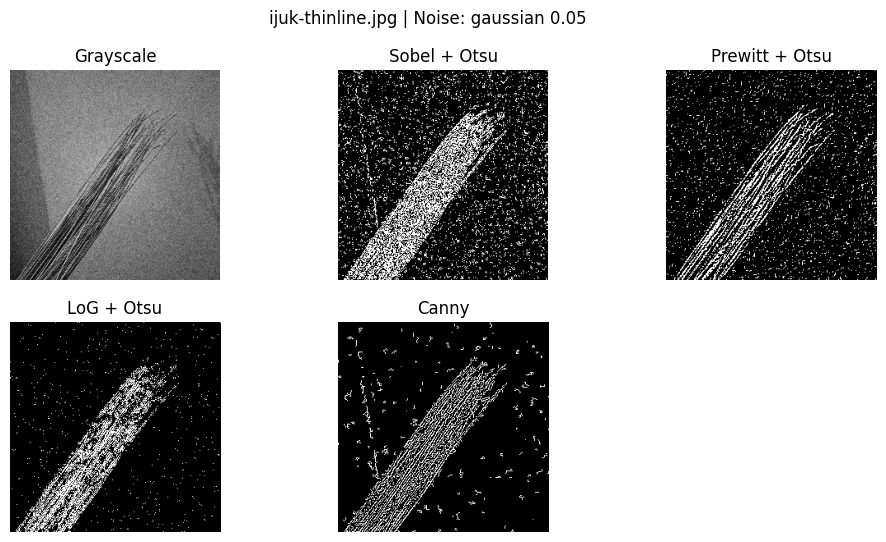

ijuk-thinline.jpg | Noise: s&p 0.01
Sobel: MSE=13722.14, PSNR=6.76 dB
Prewitt: MSE=12558.25, PSNR=7.14 dB
LoG: MSE=13219.15, PSNR=6.92 dB
Canny: MSE=12812.34, PSNR=7.05 dB
--------------------------------------------------


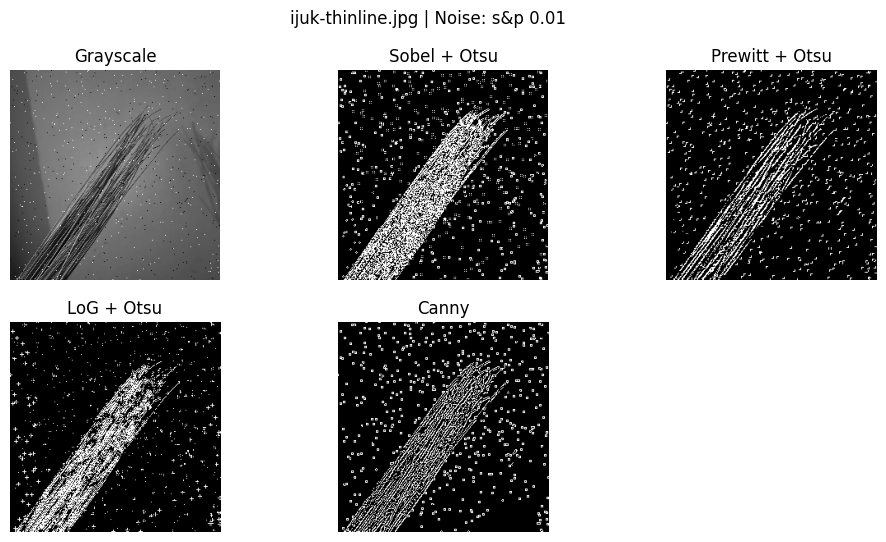

ijuk-thinline.jpg | Noise: s&p 0.05
Sobel: MSE=15496.35, PSNR=6.23 dB
Prewitt: MSE=14146.16, PSNR=6.62 dB
LoG: MSE=13054.53, PSNR=6.97 dB
Canny: MSE=14683.84, PSNR=6.46 dB
--------------------------------------------------


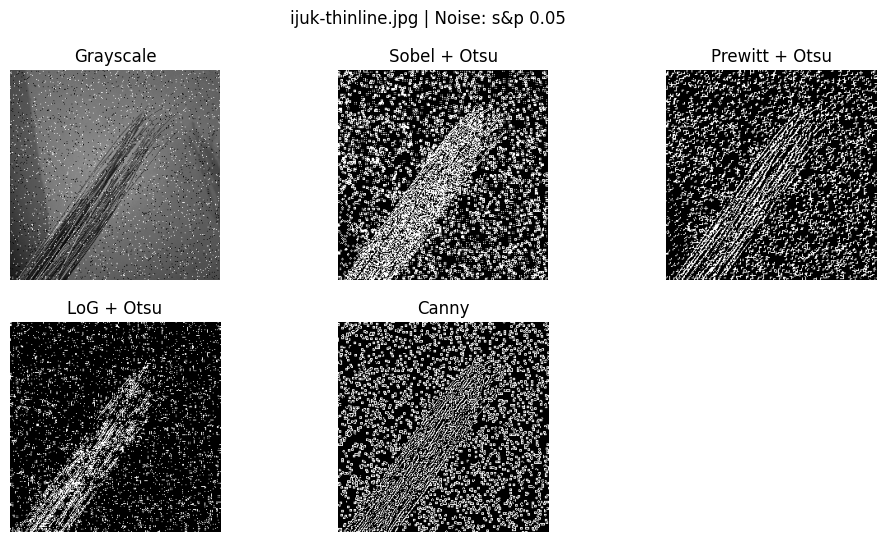

In [10]:
# Loop semua gambar + noise + operator

# Loop semua gambar dan noise
noise_levels = [0.01, 0.05]  # bisa ditambah 0.1 dst.
noise_types = [None, 'gaussian', 's&p']

for file in image_files:
    path = os.path.join(image_folder, file)
    original = preprocess_image(path, noise_type=None)  # citra asli grayscale

    for noise_type in noise_types:
        for noise_amount in noise_levels:
            # Citra dengan noise
            gray = preprocess_image(path, noise_type=noise_type, noise_amount=noise_amount)
            
            # Operator
            sobel = sobel_edge(gray)
            prewitt = prewitt_edge(gray)
            log = log_edge(gray)
            canny = canny_edge(gray)

            # Thresholding untuk non-Canny
            sobel_bin = otsu_threshold(sobel)
            prewitt_bin = otsu_threshold(prewitt)
            log_bin = otsu_threshold(log)

            # Hitung MSE & PSNR
            mse_sobel, psnr_sobel = calculate_mse_psnr(original, sobel_bin)
            mse_prewitt, psnr_prewitt = calculate_mse_psnr(original, prewitt_bin)
            mse_log, psnr_log = calculate_mse_psnr(original, log_bin)
            mse_canny, psnr_canny = calculate_mse_psnr(original, canny)  # Canny langsung biner

            print(f"{file} | Noise: {noise_type} {noise_amount}")
            print(f"Sobel: MSE={mse_sobel:.2f}, PSNR={psnr_sobel:.2f} dB")
            print(f"Prewitt: MSE={mse_prewitt:.2f}, PSNR={psnr_prewitt:.2f} dB")
            print(f"LoG: MSE={mse_log:.2f}, PSNR={psnr_log:.2f} dB")
            print(f"Canny: MSE={mse_canny:.2f}, PSNR={psnr_canny:.2f} dB")
            print("-"*50)

            # Tampilkan hasil visual (opsional)
            plt.figure(figsize=(12,6))
            plt.suptitle(f"{file} | Noise: {noise_type} {noise_amount}")
            plt.subplot(2,3,1), plt.imshow(gray, cmap='gray'), plt.title('Grayscale'), plt.axis('off')
            plt.subplot(2,3,2), plt.imshow(sobel_bin, cmap='gray'), plt.title('Sobel + Otsu'), plt.axis('off')
            plt.subplot(2,3,3), plt.imshow(prewitt_bin, cmap='gray'), plt.title('Prewitt + Otsu'), plt.axis('off')
            plt.subplot(2,3,4), plt.imshow(log_bin, cmap='gray'), plt.title('LoG + Otsu'), plt.axis('off')
            plt.subplot(2,3,5), plt.imshow(canny, cmap='gray'), plt.title('Canny'), plt.axis('off')
            plt.show()